In [24]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyod.models.deep_svdd import DeepSVDD
import scipy.io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from sklearn import preprocessing



In [ ]:
x_train,x_test,y_train,y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=0.5)

In [ ]:
model = OCSVM(kernel='linear', contamination=0.5)
model.fit(x_train)

y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)


balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

roc_auc = roc_auc_score(y_test, y_test_pred)
print("Balanced Accuracy:", balanced_acc)
print("ROC AUC:", roc_auc)

Balanced Accuracy: 0.99
ROC AUC: 0.99


In [ ]:
def plot_3d(X, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Separate inliers and outliers
    inliers = X[y == 0]
    outliers = X[y == 1]

    ax.scatter(inliers[:, 0], inliers[:, 1], inliers[:, 2], c='blue', label='Inliers', s=50)
    ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c='red', label='Outliers', s=50)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    ax.legend()
    plt.show()

<Figure size 1500x1200 with 0 Axes>

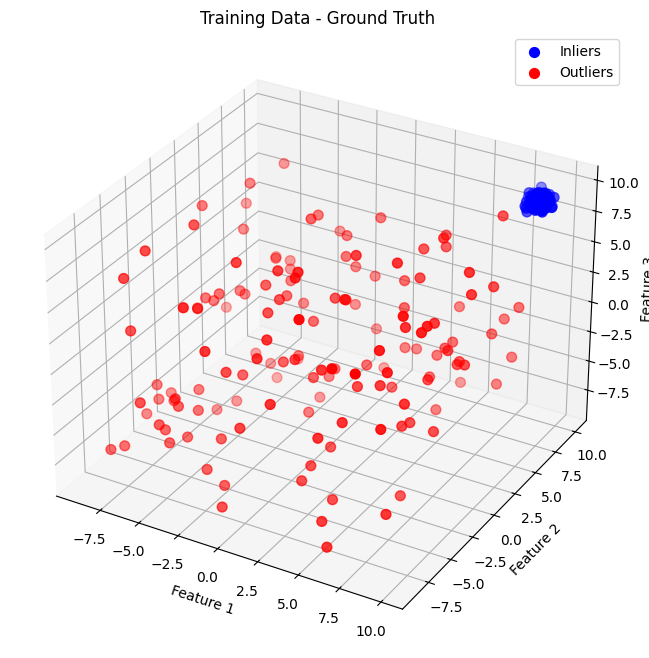

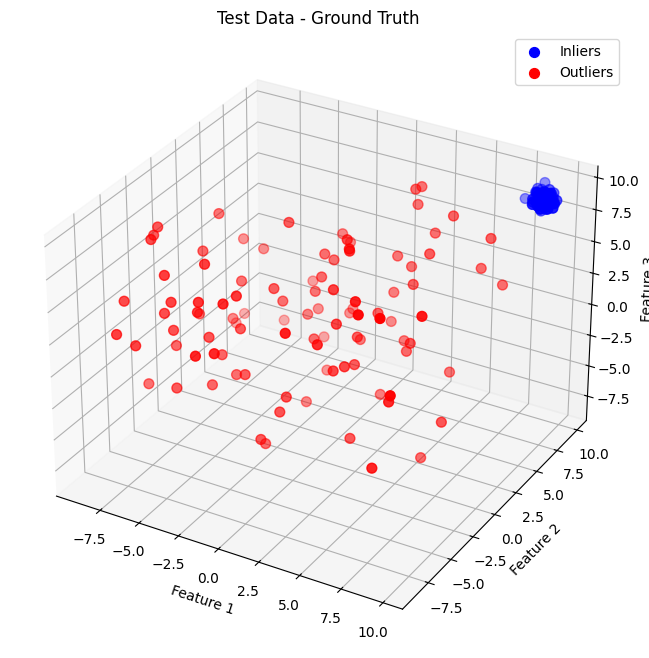

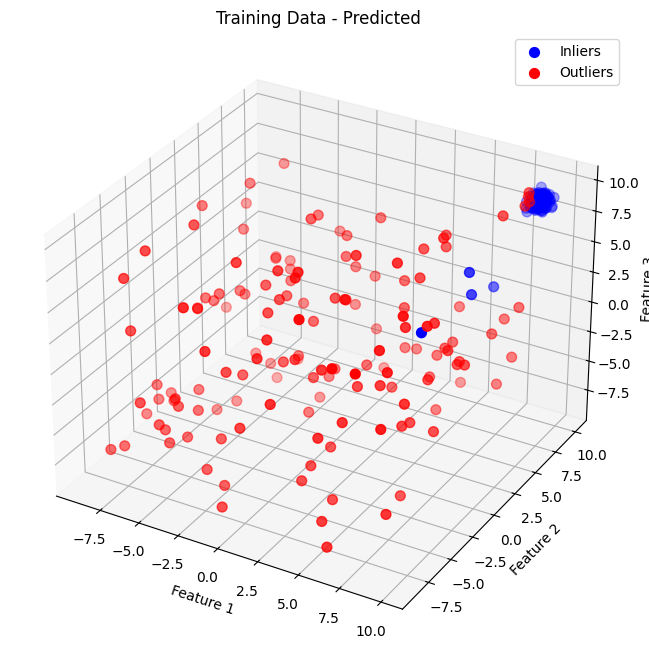

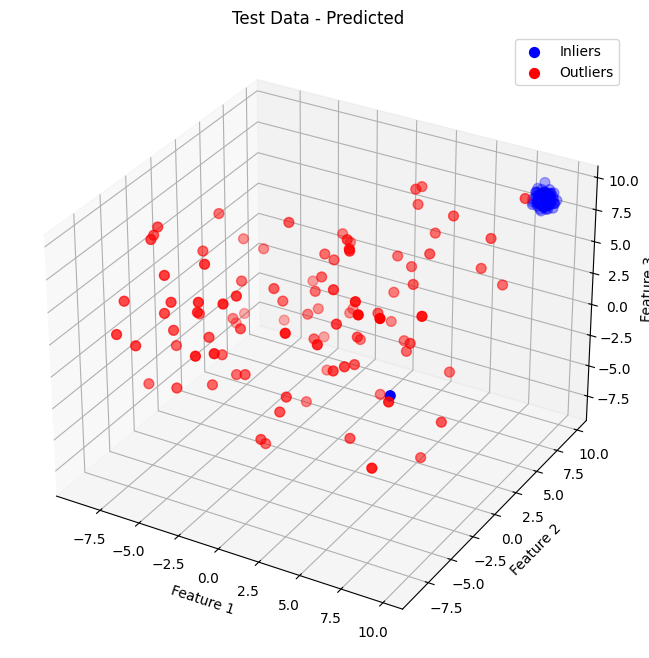

In [ ]:
fig = plt.figure(figsize=(15, 12))

plot_3d( x_train, y_train, title='Training Data - Ground Truth')

plot_3d( x_test, y_test, title='Test Data - Ground Truth')

plot_3d( x_train, y_train_pred, title='Training Data - Predicted')

plot_3d( x_test, y_test_pred, title='Test Data - Predicted')


Epoch 1/100, Loss: 8.899385809898376
Epoch 2/100, Loss: 8.946727454662323
Epoch 3/100, Loss: 8.910221338272095
Epoch 4/100, Loss: 8.74926209449768
Epoch 5/100, Loss: 8.703479647636414
Epoch 6/100, Loss: 8.815004646778107
Epoch 7/100, Loss: 8.563579678535461
Epoch 8/100, Loss: 8.719758152961731
Epoch 9/100, Loss: 8.61055999994278
Epoch 10/100, Loss: 8.647472500801086
Epoch 11/100, Loss: 8.384329199790955
Epoch 12/100, Loss: 8.683498501777649
Epoch 13/100, Loss: 8.596389710903168
Epoch 14/100, Loss: 8.619985103607178
Epoch 15/100, Loss: 8.747010588645935
Epoch 16/100, Loss: 8.583839535713196
Epoch 17/100, Loss: 8.415064185857773
Epoch 18/100, Loss: 8.66023325920105
Epoch 19/100, Loss: 8.537546515464783
Epoch 20/100, Loss: 8.790318012237549
Epoch 21/100, Loss: 9.063693910837173
Epoch 22/100, Loss: 8.547839403152466
Epoch 23/100, Loss: 8.974112510681152
Epoch 24/100, Loss: 8.736101508140564
Epoch 25/100, Loss: 8.79141080379486
Epoch 26/100, Loss: 8.723587453365326
Epoch 27/100, Loss: 8.592

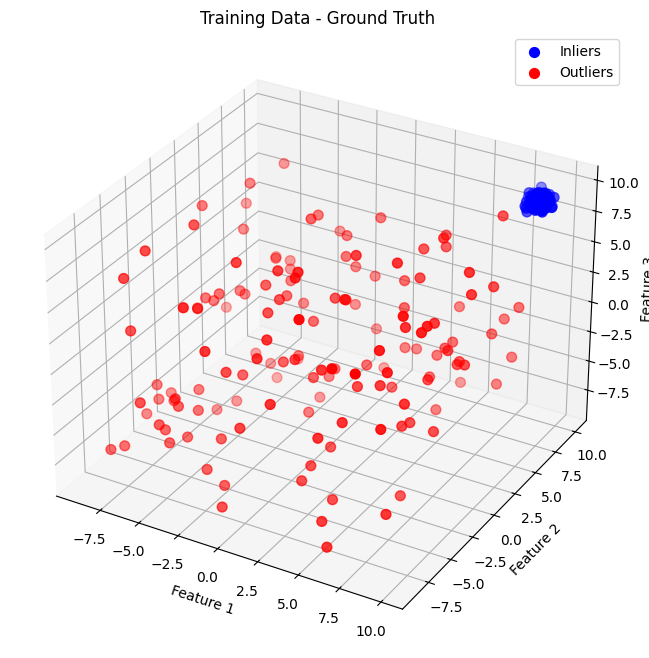

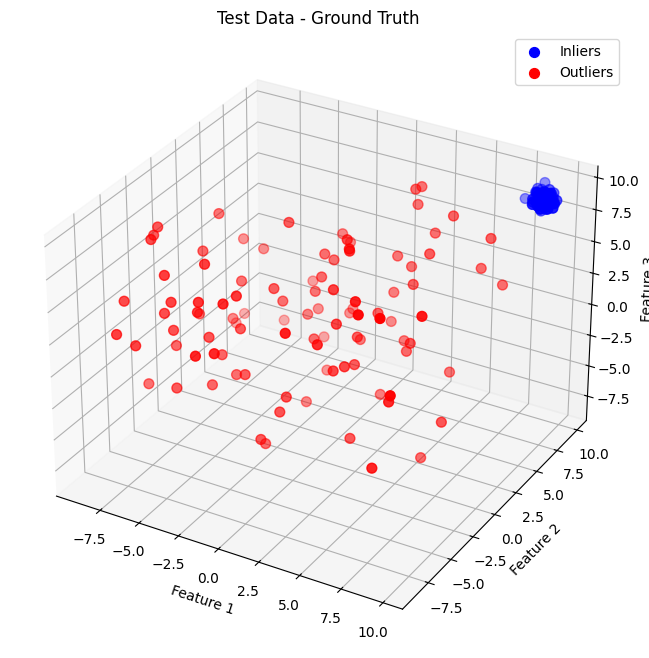

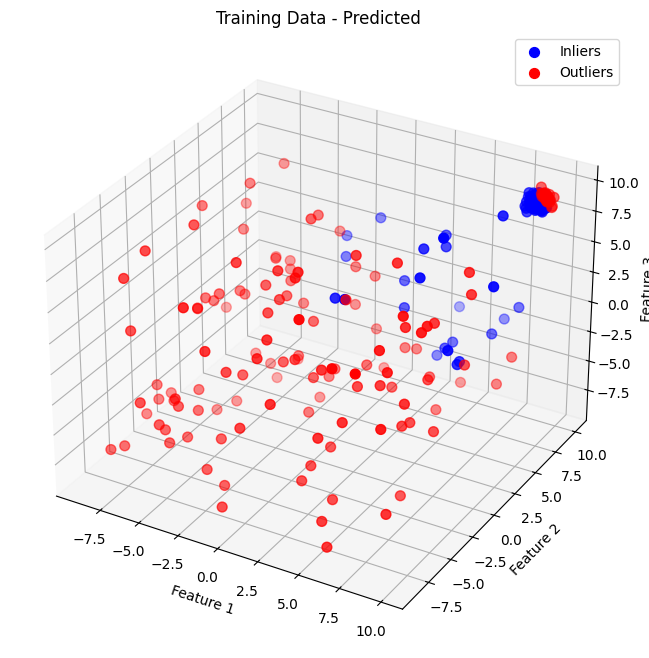

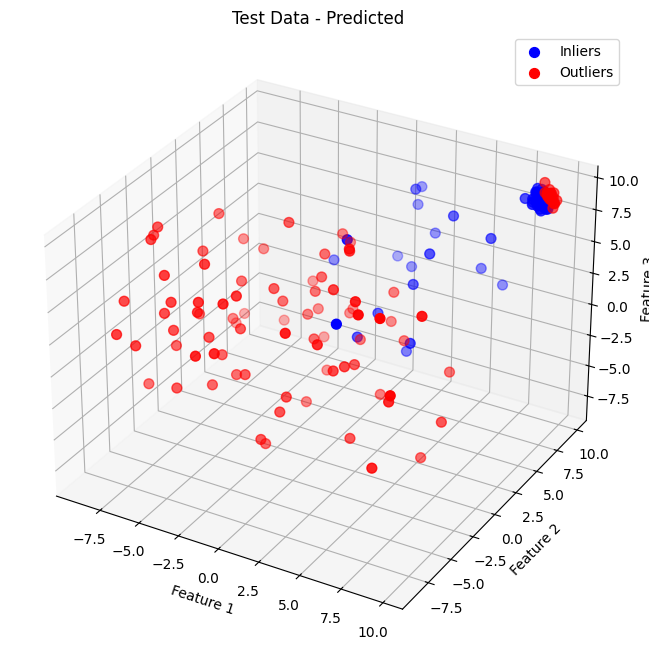

In [ ]:
model = DeepSVDD(hidden_neurons=[64, 32], hidden_activation='relu', contamination=0.5,n_features=3)
model.fit(x_train)

y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)


balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

roc_auc = roc_auc_score(y_test, y_test_pred)
print("Balanced Accuracy:", balanced_acc)
print("ROC AUC:", roc_auc)

plot_3d( x_train, y_train, title='Training Data - Ground Truth')

plot_3d( x_test, y_test, title='Test Data - Ground Truth')

plot_3d( x_train, y_train_pred, title='Training Data - Predicted')

plot_3d( x_test, y_test_pred, title='Test Data - Predicted')



In [13]:
file_path = '/content/sample_data/cardio.mat'
mat_data = loadmat(file_path)
print(mat_data.keys())


scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(mat_data['X'], mat_data['y'], train_size=0.4)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [17]:
y_train = 1 - 2*y_train
y_test = 1 - 2*y_test


param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'nu': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

ocsvm = OneClassSVM()

grid_search = GridSearchCV(estimator=ocsvm, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train,y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print("Balanced Accuracy on Test Set:", balanced_acc)
print("ROC AUC on Test Set:", roc_auc)

Best parameters found:  {'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.05}
Balanced Accuracy on Test Set: 0.6119645560602013
ROC AUC on Test Set: 0.6119645560602013


In [19]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [20]:
grid_search.cv_results_['mean_test_score']
model = OneClassSVM(kernel=best_params['kernel'], gamma=best_params['gamma'], nu=best_params['nu'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.6119645560602013

In [25]:
shuttle_data = loadmat('/content/sample_data/shuttle.mat')
X_train, X_test, y_train, y_test = train_test_split(shuttle_data['X'], shuttle_data['y'], train_size=0.5)
normalizer = preprocessing.Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [29]:
model=OCSVM(contamination= 0.1)
model.fit(X_train)
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Model OCSVM AUC: {auc}, Balanced Accuracy: {bal_acc}')

model=OCSVM(contamination= 0.3)
model.fit(X_train)
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Model OCSVM AUC: {auc}, Balanced Accuracy: {bal_acc}')

model=DeepSVDD(n_features= X_train.shape[1], epochs=10, hidden_neurons= [64, 32, 16])
model.fit(X_train)
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Model DeepSVDD AUC: {auc}, Balanced Accuracy: {bal_acc}')

model=DeepSVDD(n_features= X_train.shape[1], epochs=10, hidden_neurons= [128, 64, 132])
model.fit(X_train)
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Model DeepSVDD AUC: {auc}, Balanced Accuracy: {bal_acc}')

model=DeepSVDD(n_features= X_train.shape[1], epochs=10, hidden_neurons= [64, 32, 16])
model.fit(X_train)
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Model DeepSVDD AUC: {auc}, Balanced Accuracy: {bal_acc}')



Model OCSVM AUC: 0.974383410413024, Balanced Accuracy: 0.974383410413024
Model OCSVM AUC: 0.873218773846412, Balanced Accuracy: 0.8732187738464121
Epoch 1/10, Loss: 99.46946017257869
Epoch 2/10, Loss: 100.06858270615339
Epoch 3/10, Loss: 100.65968189015985
Epoch 4/10, Loss: 100.04247223213315
Epoch 5/10, Loss: 100.83448392525315
Epoch 6/10, Loss: 99.44221023470163
Epoch 7/10, Loss: 100.5425875429064
Epoch 8/10, Loss: 101.2950737066567
Epoch 9/10, Loss: 100.61803065612912
Epoch 10/10, Loss: 101.24351929500699
Model DeepSVDD AUC: 0.9848870366308401, Balanced Accuracy: 0.9848870366308401
Epoch 1/10, Loss: 725.1008393168449
Epoch 2/10, Loss: 718.8726590126753
Epoch 3/10, Loss: 723.9091049432755
Epoch 4/10, Loss: 723.4844219684601
Epoch 5/10, Loss: 725.3973814249039
Epoch 6/10, Loss: 721.9854644984007
Epoch 7/10, Loss: 723.2439895942807
Epoch 8/10, Loss: 720.2759110629559
Epoch 9/10, Loss: 721.8729294091463
Epoch 10/10, Loss: 727.7969252467155
Model DeepSVDD AUC: 0.9818170631449865, Balance